In [1]:
import requests
import torch
import pickle
import base64
import time
import numpy as np
import torchvision
import matplotlib.pyplot as plt

/home/swjeong/swjeong/swjenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def imshow(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
x = torch.randn(size=(64, 100, 1, 1), dtype=None)
serialized_tensor = pickle.dumps(x)
request_body = {
    "body": base64.b64encode(serialized_tensor).decode('utf-8')
}

In [16]:
# 훈련된 모델 엔드포인트 호출
trained_gan_endpoint_url = 'localhost'
end_to_end_latency_time_start = time.time()
response = requests.post(trained_gan_endpoint_url, json=request_body).json()
end_to_end_latency_time = time.time() - end_to_end_latency_time_start
pickle_y = base64.b64decode(response['body'].encode('utf-8'))
trained_y = pickle.loads(pickle_y)
print(f"End-to-end Latency time is : {end_to_end_latency_time}")
print(f"trained_y shape : {trained_y.shape}")

End-to-end Latency time is : 6.783630132675171
trained_y shape : torch.Size([64, 3, 64, 64])


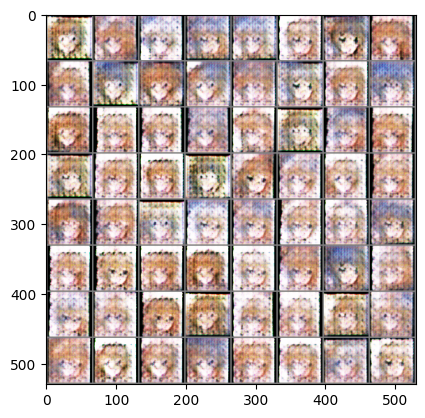

In [17]:
imshow(trained_y)

In [9]:
# 훈련되지 않은 모델 엔드포인트 호출
no_trained_gan_endpoint_url = 'localhost'
end_to_end_latency_time_start = time.time()
response = requests.post(no_trained_gan_endpoint_url, json=request_body).json()
end_to_end_latency_time = time.time() - end_to_end_latency_time_start
pickle_y = base64.b64decode(response['body'].encode('utf-8'))
no_trained_y = pickle.loads(pickle_y)
print(f"End-to-end Latency time is : {end_to_end_latency_time}")
print(f"trained_y shape : {no_trained_y.shape}")

End-to-end Latency time is : 6.675230264663696
trained_y shape : torch.Size([64, 3, 64, 64])


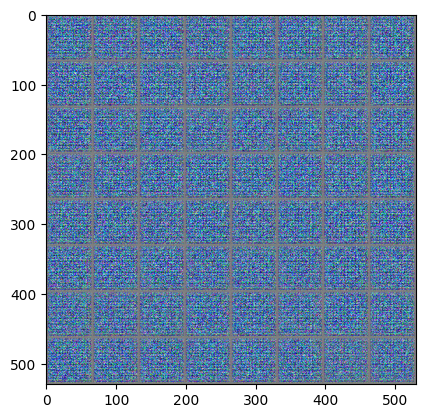

In [10]:
imshow(no_trained_y)